# Image classification using Convolutional Neural Network (CNN)

Name: Saiful Islam

Student ID: 10634911

**Convolutional Neural Network (CNN):** A Convolutional Neural Network (CNN) is a type of deep learning model primarily designed for processing structured grid data, such as images. Unlike traditional neural networks, CNNs are equipped with specialized layers called convolutional layers that can automatically and adaptively learn spatial hierarchies of features. The name "convolutional" comes from the mathematical operation applied, which focuses on local regions of the input, allowing the network to recognize patterns irrespective of their position in the image. Through successive layers, CNNs can detect more complex patterns, making them highly effective for tasks like image recognition, classification, and even video analysis.

**Dataset Selection:** In this project, rock-paper-scissors dataset is chosen for image classification. It contains three classes: rock, paper and scissor. It contains two sets of data: training & testing.
Link of the dataset:
Training: https://storage.googleapis.com/learning-datasets/rps.zip
Testing: https://storage.googleapis.com/learning-datasets/rps-test-set.zip

**Downloading dataset**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2023-08-18 00:17:42--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  23.5MB/s    in 9.1s    

2023-08-18 00:17:51 (21.1 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2023-08-18 00:17:51--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rp

**Unzipping and saving to local tmp folder**

In [1]:
import zipfile
local_zip = '../tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../tmp/')
zip_ref.close()

local_zip = '../tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../tmp/')
zip_ref.close()

**Directory assignment**

In [1]:
import os

rock_dir = os.path.join('../tmp/rps/rock')
paper_dir = os.path.join('../tmp/rps/paper')
scissors_dir = os.path.join('../tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


**Printing the first two images of each class**

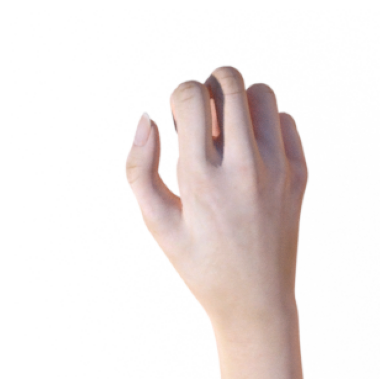

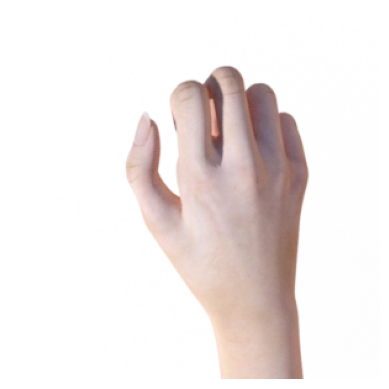

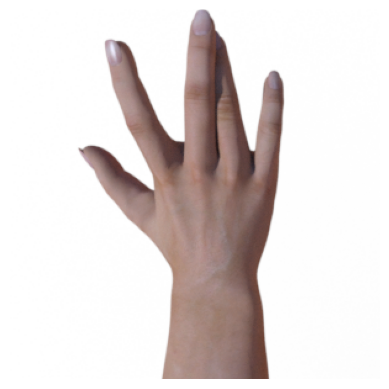

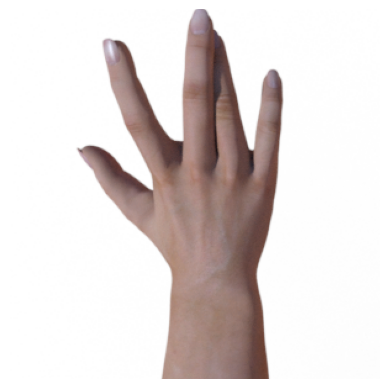

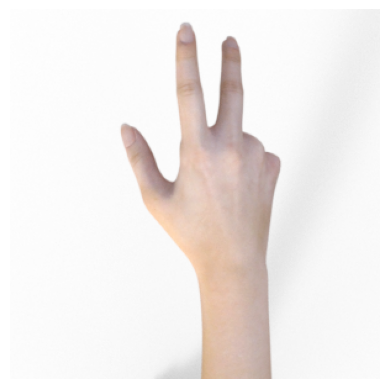

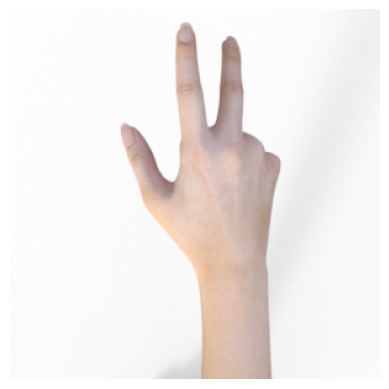

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

**Image preprocessing**

In [3]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "../tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "../tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


**Model design**

In [ ]:
from tensorflow.keras import layers, models

# Define a sequential model
model = models.Sequential([
    # Input layer specifying the shape of the input images (150x150 pixels, 3 color channels)
    layers.Input(shape=(150, 150, 3)),

    # First convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),  # Max pooling reduces spatial dimensions (downsampling)

    # Second convolutional layer
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Third convolutional layer, increasing filters to 128 for deeper feature extraction
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Fourth convolutional layer with 128 filters
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output to convert 2D feature maps into a 1D feature vector
    layers.Flatten(),

    # Dropout layer to prevent overfitting by randomly deactivating 50% of neurons
    layers.Dropout(0.5),

    # Fully connected (dense) layer with 512 neurons and ReLU activation
    layers.Dense(512, activation='relu'),

    # Output layer with 3 neurons (for 3-class classification) and softmax activation
    layers.Dense(3, activation='softmax')
])

**Model Summary**

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

**Visualizing Model Architecture**

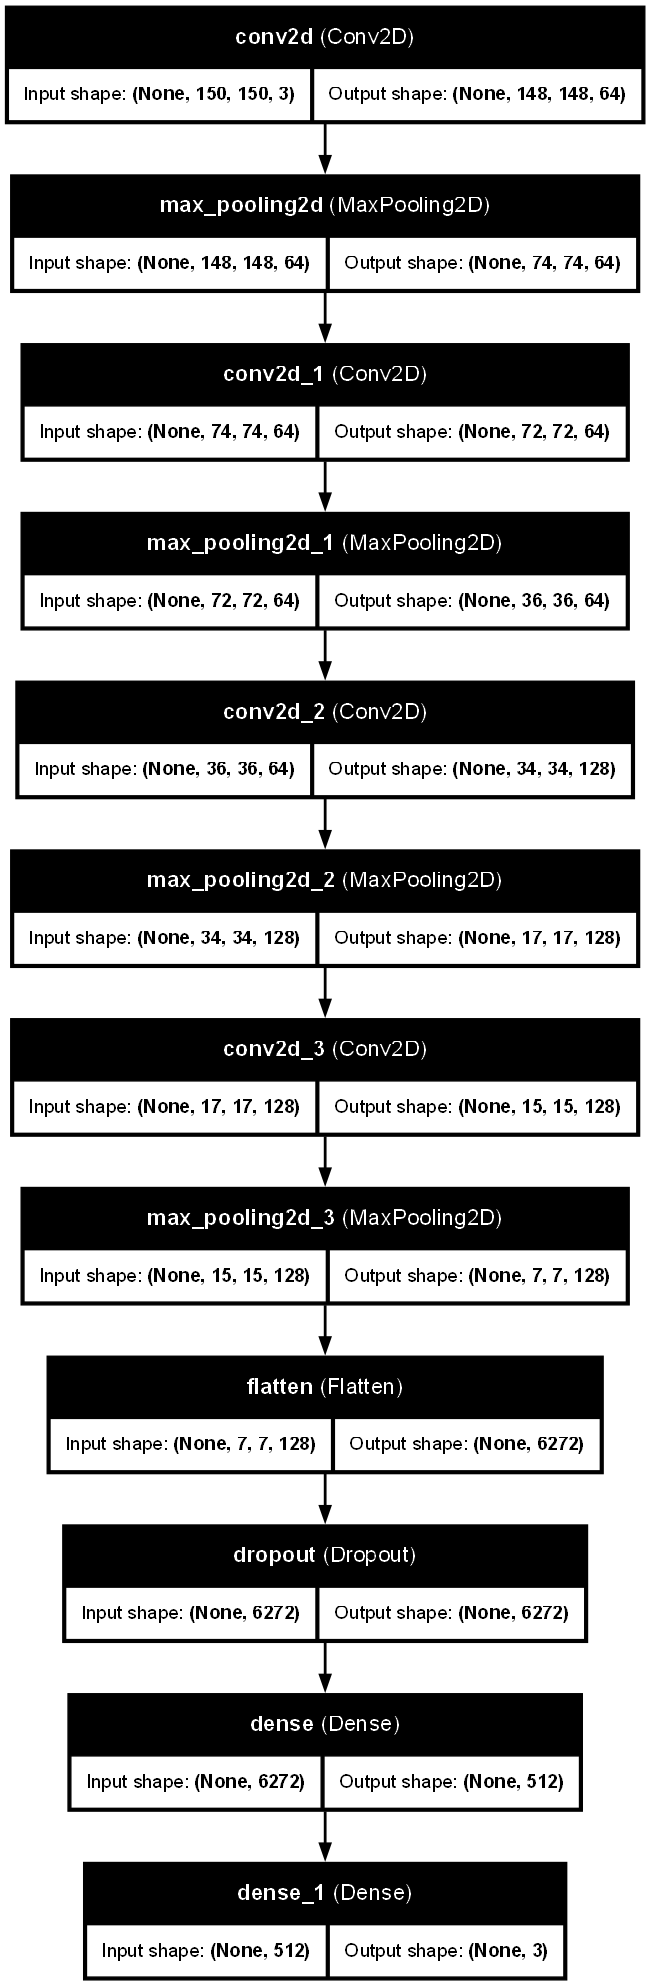

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=100)

**Setting no of Epoc**

In [7]:
epoc_no = 15

**Model Compiling & Fitting**

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_model = model.fit(train_generator, epochs=epoc_no, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

c:\Users\ISLAMS2\Documents\Projects\AroAI\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.3314 - loss: 1.2250

c:\Users\ISLAMS2\Documents\Projects\AroAI\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 866ms/step - accuracy: 0.3314 - loss: 1.2213 - val_accuracy: 0.3333 - val_loss: 1.0948
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 818ms/step - accuracy: 0.3737 - loss: 1.1096 - val_accuracy: 0.3333 - val_loss: 1.0951
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 793ms/step - accuracy: 0.4026 - loss: 1.0918 - val_accuracy: 0.3333 - val_loss: 1.1258
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 794ms/step - accuracy: 0.4024 - loss: 1.0656 - val_accuracy: 0.4758 - val_loss: 0.9622
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 815ms/step - accuracy: 0.5165 - loss: 0.9711 - val_accuracy: 0.7419 - val_loss: 0.4723
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 830ms/step - accuracy: 0.5971 - loss: 0.7793 - val_accuracy: 0.7043 - val_loss: 0.4196
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 894ms/step - accuracy: 0.6690 - loss: 0.7328 - val_accuracy: 0.8871 - val_loss: 0.3556
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 896ms/step - accuracy: 0.7361 - loss: 0.5742 - val_accuracy: 0.731

**Saving the compiled model**

In [9]:
model.save("../tmp/rps.keras")

**Storing model history data into a DataFrame**

In [10]:
from pandas import DataFrame

model_DF = DataFrame(history_model.history)
model_DF

,accuracy,loss,val_accuracy,val_loss
0,0.331746,1.146840,0.333333,1.094824
1,0.378175,1.116526,0.333333,1.095059
2,0.417460,1.127149,0.333333,1.125838
3,0.452778,1.012466,0.475806,0.962197
4,0.546429,0.913500,0.741935,0.472329
5,0.610714,0.782180,0.704301,0.419580
6,0.665873,0.771681,0.887097,0.355634
7,0.738492,0.561674,0.731183,0.461057
8,0.778571,0.521866,0.948925,0.183249
9,0.811905,0.452134,0.924731,0.186044


**Applying VGG16 on the above dataset**

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in vgg_model.layers:
  layer.trainable = False

x = vgg_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(3, activation='softmax')(x)
vgg_model = Model(vgg_model.input, output)

**Model Summary**

In [12]:
vgg_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,107,395 (88.15 MB)

 Trainable params: 8,392,707 (32.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Visualizing Model Architecture**

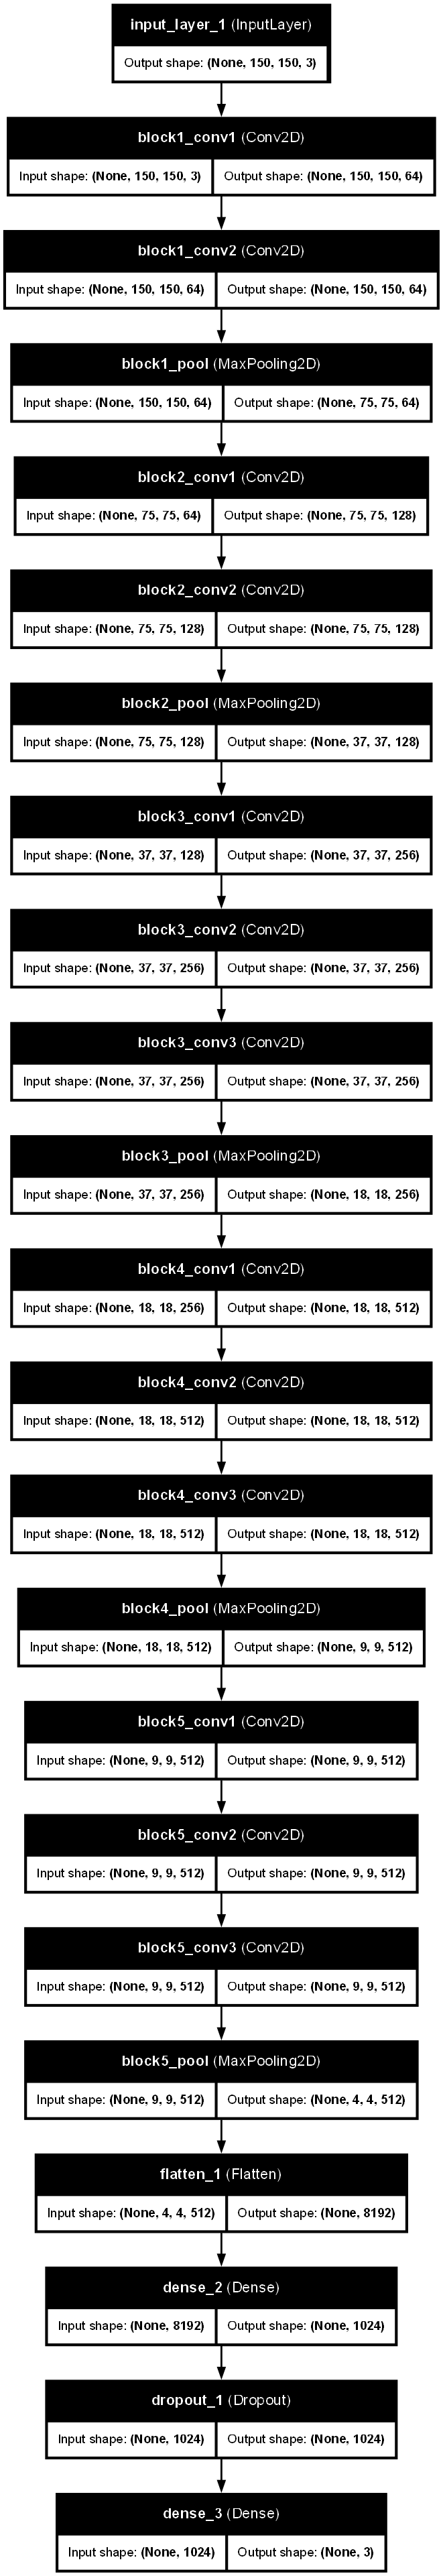

In [13]:
plot_model(vgg_model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=100)

**Model Compiling & Fitting**

In [14]:
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg_history = vgg_model.fit( train_generator, steps_per_epoch=len(train_generator), epochs=epoc_no, verbose=1, validation_data=validation_generator, validation_steps=len(validation_generator))

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5762 - loss: 2.4003 - val_accuracy: 0.9597 - val_loss: 0.0933
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9378 - loss: 0.1637 - val_accuracy: 0.8414 - val_loss: 0.4015
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9699 - loss: 0.0800 - val_accuracy: 0.9731 - val_loss: 0.0663
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.9845 - loss: 0.0513 - val_accuracy: 0.9247 - val_loss: 0.1414
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9895 - loss: 0.0387 - val_accuracy: 0.9220 - val_loss: 0.1712
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9827 - loss: 0.0552 - val_accuracy: 0.9140 - val_loss: 0.1745
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9086 - val_loss: 0.1869
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9944 - loss: 0.0237 - val_accuracy: 0.8898 - val_loss:

**Storing VGG16 history data into a DataFrame**

In [15]:
vgg16_DF = DataFrame(vgg_history.history)
rename_columns = {'loss': 'vgg-loss',	'accuracy': 'vgg-accuracy',	'val_loss': 'vgg-val_loss',	'val_accuracy': 'vgg-val_accuracy'}
vgg16_DF.rename(columns = rename_columns, inplace = True)
vgg16_DF

,vgg-accuracy,vgg-loss,vgg-val_accuracy,vgg-val_loss
0,0.724603,1.261433,0.959677,0.093271
1,0.946825,0.141671,0.841398,0.401536
2,0.973413,0.074795,0.973118,0.066341
3,0.984127,0.050468,0.924731,0.141428
4,0.986905,0.041536,0.922043,0.171209
5,0.985317,0.044761,0.913979,0.174535
6,0.992063,0.025631,0.908602,0.186889
7,0.994444,0.024994,0.889785,0.265098
8,0.992857,0.023202,0.897849,0.230289
9,0.992063,0.026947,0.927419,0.109548


In [16]:
from pandas import concat

histories_DF = concat([model_DF, vgg16_DF], axis=1)
histories_DF

,accuracy,loss,val_accuracy,val_loss,vgg-accuracy,vgg-loss,vgg-val_accuracy,vgg-val_loss
0,0.331746,1.146840,0.333333,1.094824,0.724603,1.261433,0.959677,0.093271
1,0.378175,1.116526,0.333333,1.095059,0.946825,0.141671,0.841398,0.401536
2,0.417460,1.127149,0.333333,1.125838,0.973413,0.074795,0.973118,0.066341
3,0.452778,1.012466,0.475806,0.962197,0.984127,0.050468,0.924731,0.141428
4,0.546429,0.913500,0.741935,0.472329,0.986905,0.041536,0.922043,0.171209
5,0.610714,0.782180,0.704301,0.419580,0.985317,0.044761,0.913979,0.174535
6,0.665873,0.771681,0.887097,0.355634,0.992063,0.025631,0.908602,0.186889
7,0.738492,0.561674,0.731183,0.461057,0.994444,0.024994,0.889785,0.265098
8,0.778571,0.521866,0.948925,0.183249,0.992857,0.023202,0.897849,0.230289
9,0.811905,0.452134,0.924731,0.186044,0.992063,0.026947,0.927419,0.109548


**Finally adding a column named "Epoc" which is epoc no**

In [17]:
histories_DF['Epoc'] = histories_DF.index + 1
histories_DF

,accuracy,loss,val_accuracy,val_loss,vgg-accuracy,vgg-loss,vgg-val_accuracy,vgg-val_loss,Epoc
0,0.331746,1.146840,0.333333,1.094824,0.724603,1.261433,0.959677,0.093271,1
1,0.378175,1.116526,0.333333,1.095059,0.946825,0.141671,0.841398,0.401536,2
2,0.417460,1.127149,0.333333,1.125838,0.973413,0.074795,0.973118,0.066341,3
3,0.452778,1.012466,0.475806,0.962197,0.984127,0.050468,0.924731,0.141428,4
4,0.546429,0.913500,0.741935,0.472329,0.986905,0.041536,0.922043,0.171209,5
5,0.610714,0.782180,0.704301,0.419580,0.985317,0.044761,0.913979,0.174535,6
6,0.665873,0.771681,0.887097,0.355634,0.992063,0.025631,0.908602,0.186889,7
7,0.738492,0.561674,0.731183,0.461057,0.994444,0.024994,0.889785,0.265098,8
8,0.778571,0.521866,0.948925,0.183249,0.992857,0.023202,0.897849,0.230289,9
9,0.811905,0.452134,0.924731,0.186044,0.992063,0.026947,0.927419,0.109548,10


**Function definitation:** training_validation_accuracy() to plot training vs validation accuracy for each model

In [18]:
from matplotlib.pyplot import plot, title, legend, figure, show

def training_valiadation_accuracy(model_history, model_name):
  epochs = range(len(model_history['accuracy']))
  plot(epochs, model_history['accuracy'], 'r', label='Training accuracy') # To get training accuracy
  plot(epochs, model_history['val_accuracy'], 'b', label='Validation accuracy') # To get validation accuracy
  title('Training and validation accuracy for: ' + model_name)
  legend(loc=0)
  figure()
  show()

**Training and validation accuracy for model**

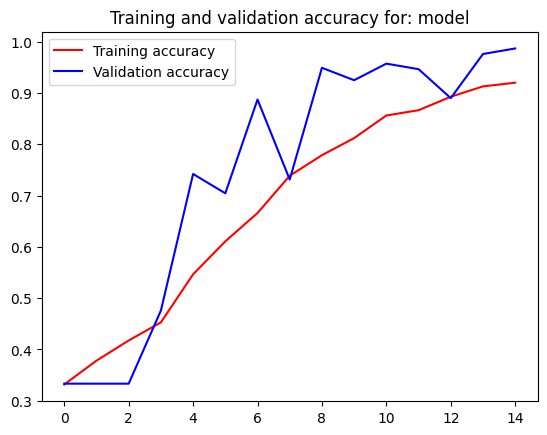

<Figure size 640x480 with 0 Axes>

In [19]:
training_valiadation_accuracy(history_model.history, 'model')

**Training and validation accuracy for VGG16**

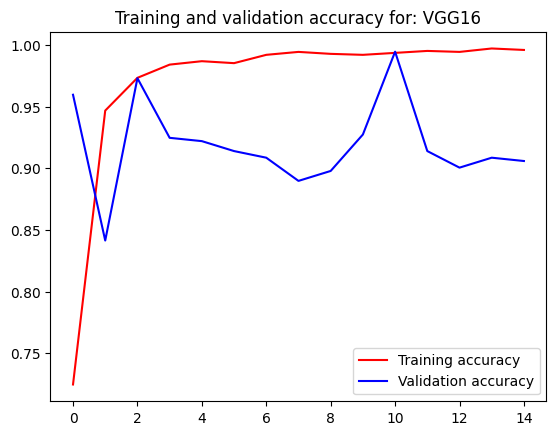

<Figure size 640x480 with 0 Axes>

In [20]:
training_valiadation_accuracy(vgg_history.history, 'VGG16')

**Histogram of Accuracy of each model vs Epoc no**

<Axes: xlabel='Epoc'>

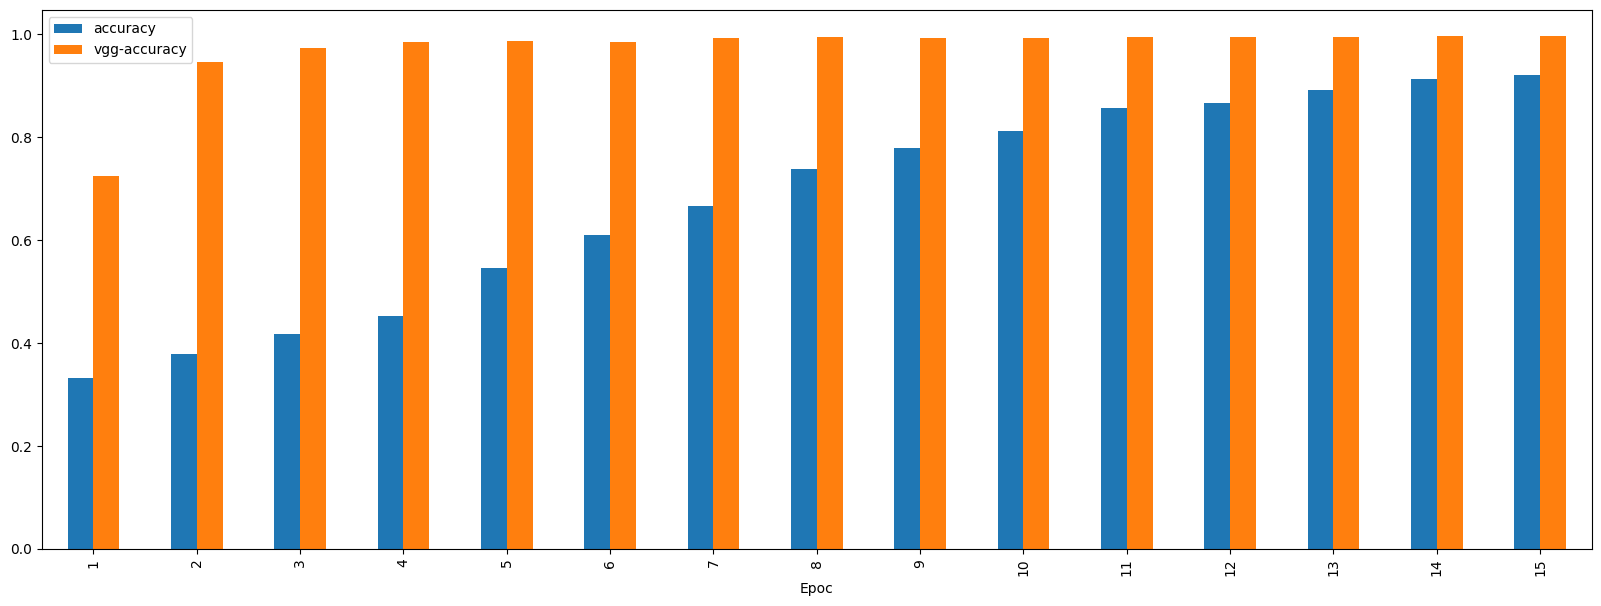

In [21]:
histories_DF.plot(x='Epoc', y=['accuracy', 'vgg-accuracy'], kind='bar', figsize=(20,7))

# Loading model from saved HDF5 file

In [22]:
from keras.models import load_model
model_saved = load_model("../tmp/rps.keras")
model_saved.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,946,952 (26.50 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,473,477 (13.25 MB)

**Conclusions:** Best Model: Based on the given results, VGG16 is the best model for this dataset as it has the highest validation accuracy and the lowest validation loss.

**Selecting the best model: VGG16**

In [23]:
best_model = vgg_model

**Saving the model for deployment**

In [24]:
best_model.save("../tmp/rps.keras")

**Loading model from saved HDF5 file**

In [1]:
from keras.models import load_model

model_saved = load_model("../tmp/rps.keras")
model_saved.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,892,811 (152.18 MB)

 Trainable params: 8,392,707 (32.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 16,785,416 (64.03 MB)

**Prediction (Google Colab)**

In [ ]:
from numpy import expand_dims, vstack
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = expand_dims(x, axis=0)

  images = vstack([x])
  classes = model_saved.predict(images, batch_size=10)
  print(fn)
  print(classes)

**Prediction (Local VS Code/ Jupyter)**

In [4]:
import tkinter as tk
from tkinter import filedialog
from numpy import expand_dims, vstack
from tensorflow.keras.utils import load_img, img_to_array

# Create a file selection dialog
root = tk.Tk()
root.withdraw()  # Hide the main window
file_paths = filedialog.askopenfilenames(title="Select Image Files", filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])

for path in file_paths:
    # Load and preprocess the image
    img = load_img(path, target_size=(150, 150))  # Resize to match model input
    x = img_to_array(img)  # Convert to NumPy array
    x = expand_dims(x, axis=0)  # Expand to 4D (batch size)

    images = vstack([x])  # Stack images for batch processing
    classes = model_saved.predict(images, batch_size=10)  # Predict using the saved model

    print(f"Predicted Classes: {classes}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Classes: [[4.366751e-09 1.000000e+00 0.000000e+00]]
